In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime

In [67]:

def time_to_seconds(time_str):
    time_obj = datetime.strptime(time_str, "%M:%S.%f")
    total_seconds = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
    
    return float(total_seconds)

In [68]:
cpu_times = []
cpu_times_err = []
wall_clock_times = []
wall_clock_times_err = []
particle_counts = [1500, 3500, 7500, 17000, 37000, 85000, 190000, 420000, 950000, 2200000]

In [69]:
for i in ["", "_1", "_2", "_3", "_4", "_5", "_6", "_7", "_8", "_9"]:
    with open("output_logs/tracmass_output{}.txt".format(i)) as f:
        lines = f.readlines()

        user_time = [float(lines[2].split()[-1]), float(lines[26].split()[-1]), float(lines[50].split()[-1])]


        system_time = [float(lines[3].split()[-1]), float(lines[27].split()[-1]), float(lines[51].split()[-1])]

        # Wall clock time is stored in mm:ss format so convert it to seconds
        wall_clock_time = [time_to_seconds(lines[5].split()[-1]), time_to_seconds(lines[29].split()[-1]), time_to_seconds(lines[53].split()[-1])]

        # Divide by 25 == number of total steps == intrun*iter
        cpu_times.append(1000*(np.mean(user_time) + np.mean(system_time))/25)
        cpu_times_err.append(1000*(np.std(user_time) + np.std(system_time))/25)

        wall_clock_times.append(1000*np.mean(wall_clock_time)/25)
        wall_clock_times_err.append(1000*np.std(wall_clock_time)/25)

        


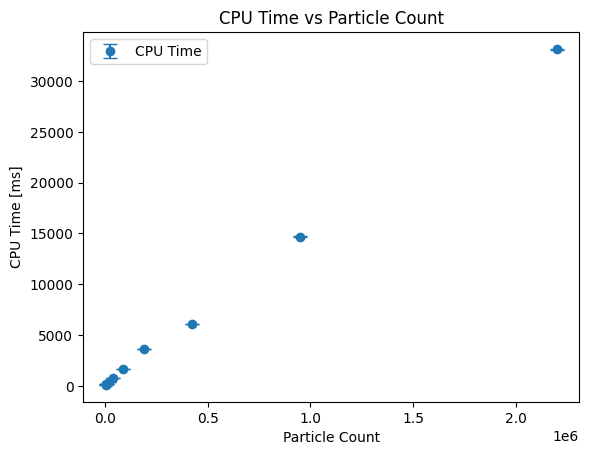

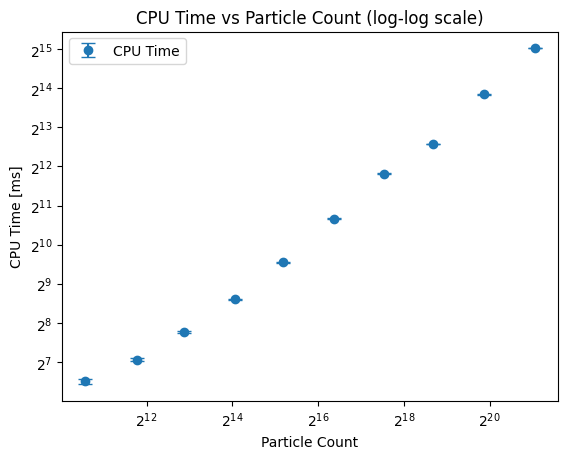

In [70]:
# CPU time vs particle count
plt.errorbar(particle_counts, cpu_times, cpu_times_err, label="CPU Time", fmt='o', capsize=5)
plt.xlabel("Particle Count")
plt.ylabel("CPU Time [ms]")
plt.title("CPU Time vs Particle Count")
plt.legend()
plt.show()

# CPU time vs particle count log-log scale
plt.errorbar(particle_counts, cpu_times, cpu_times_err, label="CPU Time", fmt='o', capsize=5)
plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.xlabel("Particle Count")
plt.ylabel("CPU Time [ms]")
plt.title("CPU Time vs Particle Count (log-log scale)")
plt.legend()
plt.show()

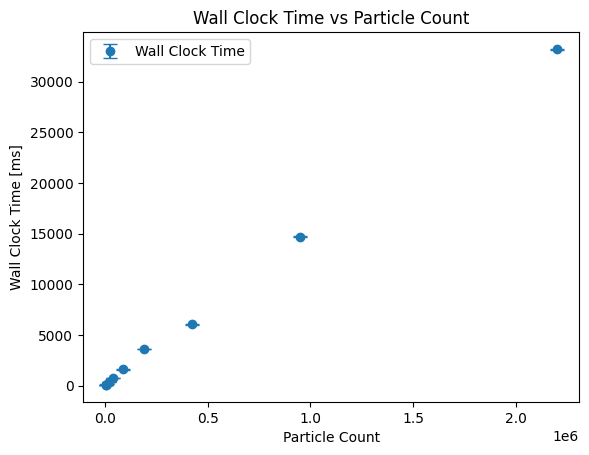

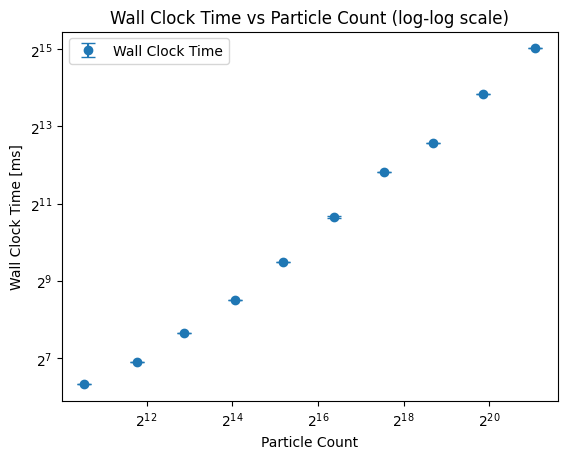

In [71]:
# Wall clock time vs particle count
plt.errorbar(particle_counts, wall_clock_times, wall_clock_times_err, label="Wall Clock Time", fmt='o', capsize=5)
plt.xlabel("Particle Count")
plt.ylabel("Wall Clock Time [ms]")
plt.title("Wall Clock Time vs Particle Count")
plt.legend()
plt.show()

# Wall clock time vs particle count log-log scale
plt.errorbar(particle_counts, wall_clock_times, wall_clock_times_err, label="Wall Clock Time", fmt='o', capsize=5)
plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.xlabel("Particle Count")
plt.ylabel("Wall Clock Time [ms]")
plt.title("Wall Clock Time vs Particle Count (log-log scale)")
plt.legend()
plt.show()